## Assignment 28.1
### ACD MDS (Mar 2018 batch) Student: K. Anandaranga
### KNN

In [1]:
# In this assignment, students will be using the K-nearest neighbors algorithm to predict
# how many points NBA players scored in the 2013-2014 season.

#### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

%matplotlib inline

In [4]:
pd.options.display.max_columns = 999

#### Importing data

In [5]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [6]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,0,0,NaN,93,185,0.502703,0.503,79,136,0.581,142,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,0,0,NaN,143,275,0.520000,0.520,76,119,0.639,102,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,328,2013-2014,2013


In [7]:
nba.shape

(481, 31)

#### Dependent variable

In [8]:
nba.pts.describe()

count     481.000000
mean      516.582121
std       470.422228
min         0.000000
25%       115.000000
50%       401.000000
75%       821.000000
max      2593.000000
Name: pts, dtype: float64

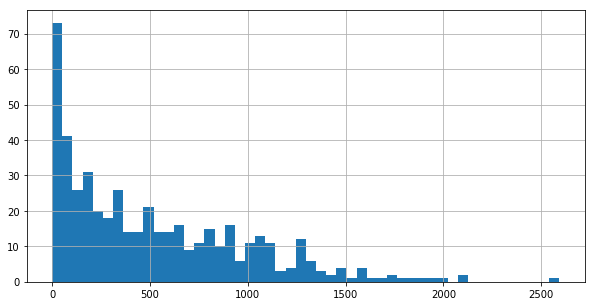

In [9]:
nba.pts.hist(bins=50, figsize=(10,5))
plt.show()

#### The dependent variable shows that we will need to use the Regressor instead of Classifier

In [10]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

#### Identifying the Object datatypes

In [11]:
obj_cols = nba.dtypes[nba.dtypes == 'object'].index

print ("Object columns= ", obj_cols)

Object columns=  Index(['player', 'pos', 'bref_team_id', 'season'], dtype='object')


#### We need to remove the 'player' data column since it cannot be used as an independent variable

In [12]:
nba_modified = nba.drop(['player'],axis=1)

#### We need to convert the 3 remainning 'Object' datatypes to 'Numeric'

In [13]:
nba.pos.value_counts()

SG    109
SF     99
PF     96
C      90
PG     85
F       1
G       1
Name: pos, dtype: int64

In [14]:
nba.bref_team_id.value_counts()

TOT    63
NOP    18
OKC    17
UTA    16
LAC    16
LAL    16
DAL    15
MIA    15
BRK    15
HOU    15
DET    15
PHO    15
ATL    15
NYK    15
POR    15
SAS    14
BOS    14
CLE    14
MIN    14
WAS    14
MIL    13
MEM    13
CHA    13
ORL    13
PHI    12
GSW    12
IND    12
DEN    12
CHI    11
TOR    10
SAC     9
Name: bref_team_id, dtype: int64

In [15]:
nba.season.value_counts()

2013-2014    481
Name: season, dtype: int64

#### Map of categorical variables to Numeric

In [16]:
map_season = {'2013-2014': 1}
map_bref_team_id = {'TOT': 1, 'NOP':2, 'OKC':3, 'LAL':4, 'UTA':5, 'LAC':6, 'DET':7, 'HOU':8, 'NYK':9, 'BRK':10, 'MIA':11, 'DAL':12, 
                    'ATL':13, 'PHO':14, 'POR':15, 'BOS':16, 'SAS':17, 'CLE':18, 'WAS':19, 'MIN':20, 'MIL':21, 'MEM':22, 'ORL':23,
                    'CHA':24, 'DEN':25, 'GSW':26, 'IND':27, 'PHI':28, 'CHI':29, 'TOR':30 , 'SAC':31 
                   }

map_pos = {'SG': 1, 'SF':2, 'PF':3, 'C':4, 'PG':5, 'F':6, 'G':7}

In [17]:
nba_modified.replace({'season':map_season, 'bref_team_id':map_bref_team_id, 'pos':map_pos} , inplace = True)

In [18]:
nba_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 30 columns):
pos             481 non-null int64
age             481 non-null int64
bref_team_id    481 non-null int64
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk             481 non-null int64
tov       

#### All the columns are Non-Null and Numeric; now we need to correct for NaN values

In [19]:
nba_modified.isna().sum()

pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

#### The total number of NaNs are small enough that they can be dropped

In [20]:
nba_modified.dropna(inplace = True)

In [21]:
# Separating to X and Y

X = nba_modified.drop(['pts'],axis=1)
Y = nba_modified['pts']

In [22]:
X.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,season,season_end
0,2,23,1,63,0,847,66,141,0.468,4,15,0.266667,62,126,0.492063,0.482,35,53,0.660,72,144,216,28,23,26,30,122,1,2013
3,1,28,23,73,73,2552,464,1011,0.459,128,300,0.426667,336,711,0.472574,0.522,274,336,0.815,32,230,262,248,35,3,146,136,1,2013
4,4,25,2,56,30,951,136,249,0.546,0,1,0.000000,136,248,0.548387,0.546,56,67,0.836,94,183,277,40,23,46,63,187,1,2013
6,3,28,15,69,69,2498,652,1423,0.458,3,15,0.200000,649,1408,0.460938,0.459,296,360,0.822,166,599,765,178,63,68,123,147,1,2013
7,3,24,1,65,2,1072,134,300,0.447,2,13,0.153846,132,287,0.459930,0.450,33,50,0.660,119,192,311,71,24,33,44,126,1,2013


In [23]:
#k-nearest neighbour
import numpy as np
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=100)

# loading library
from sklearn.neighbors import KNeighborsRegressor

# instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=3)
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
# fitting the model
knn.fit(X_train, Y_train)
# predict the response
pred = knn.predict(X_test)


# Compute the mean squared error of our predictions.
mse = (((Y_test - pred) ** 2).sum()) / len(pred)
mse


6297.0317460317474

#### Evaluate the prediction error for different K values

In [26]:
for K in range(25):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X_train, Y_train) 
    y_pred = neigh.predict(X_test)
    print("Mean Squared Error is ", (((Y_test - y_pred) ** 2).sum()) / len(y_pred),"% for K-Value:",K_value)


Mean Squared Error is  8818.42105263 % for K-Value: 1
Mean Squared Error is  7285.73308271 % for K-Value: 2
Mean Squared Error is  6297.03174603 % for K-Value: 3
Mean Squared Error is  6305.97650376 % for K-Value: 4
Mean Squared Error is  6688.12330827 % for K-Value: 5
Mean Squared Error is  6457.65705931 % for K-Value: 6
Mean Squared Error is  6868.45419672 % for K-Value: 7
Mean Squared Error is  7273.01480263 % for K-Value: 8
Mean Squared Error is  6617.95108141 % for K-Value: 9
Mean Squared Error is  6624.31067669 % for K-Value: 10
Mean Squared Error is  7048.97514447 % for K-Value: 11
Mean Squared Error is  7514.15643275 % for K-Value: 12
Mean Squared Error is  7883.80606843 % for K-Value: 13
Mean Squared Error is  7920.90827835 % for K-Value: 14
Mean Squared Error is  7947.14235589 % for K-Value: 15
Mean Squared Error is  8215.25334821 % for K-Value: 16
Mean Squared Error is  8341.4275828 % for K-Value: 17
Mean Squared Error is  8378.51376125 % for K-Value: 18
Mean Squared Error i

#### Mean squared error is the lowest at K = 3